In [134]:
# Librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Estilos
sns.set(style='whitegrid')

In [135]:
# Carga de datos
df = pd.read_csv('../data/processed/top_12_carros_vendidos.csv')

# Columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist() # Tomamos las variables categóricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Tomamos las variables numéricas
columnas_numericas = [col for col in columnas_numericas if col != 'price'] # Exlcuimos la variable a predecir

In [136]:
# Instanciar el codificador OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar OneHotEncoding a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, columnas_categoricas),
        ('num', StandardScaler(), columnas_numericas) # columnas categóricas
    ],
    remainder='passthrough'  # Mantener las columnas no incluidas
)

In [137]:
# Transformar los datos
X = preprocessor.fit_transform(df.drop(columns=['price']))
y = df['price']  # Variable objetivo

In [138]:
# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
# Instanciar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

In [145]:
# R² (Coeficiente de Determinación)
r2 = round((r2_score(y_test, y_pred)),3)
print(f"r2: {r2}")

# Error Cuadrático Medio
mse = round(mean_squared_error(y_test, y_pred), 3)
print(f"mse: {mse}\n")

# Raiz del MSE
rmse = round((mse ** 0.5), 3)
print(f"Raíz del Error Cuadrático Medio (MSE): {rmse} unidades monetarias")

# Error relativo
error_relativo = round((rmse / df.price.mean() *100),3)
print(f'Error relativo de acuerdo con el promedio de price: {error_relativo}')

r2: 0.792
mse: 10447043.535

Raíz del Error Cuadrático Medio (MSE): 3232.189 unidades monetarias
Error relativo de acuerdo con el promedio de price: 22.866


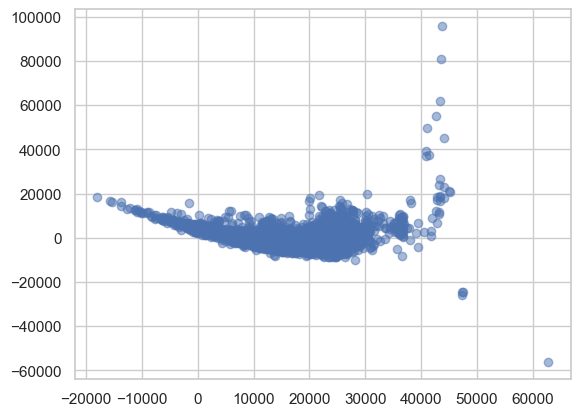

In [141]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()